In [17]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [18]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [19]:
FOLDS = 10

cv_scores = []

max_neighbors_for_knn = int(len(X) * ((FOLDS - 1) / FOLDS))

# remove all multiples of the number of features
num_features = X.shape[1]

# knn range without multiples of the number of features
knn_range = [i for i in range(1, max_neighbors_for_knn + 1) if i % num_features != 0]

for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=FOLDS, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 13 with an error of 0.0200


Text(0, 0.5, 'Misclassification Error')

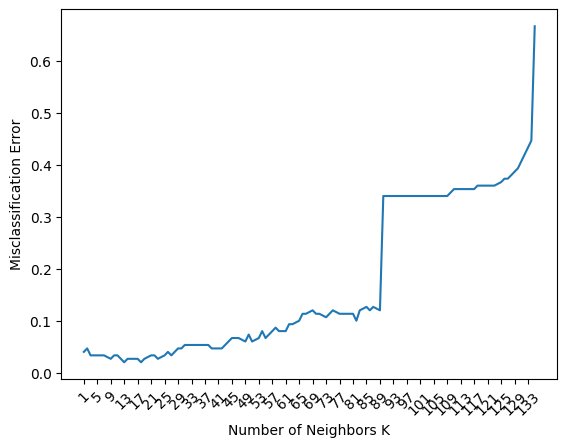

In [27]:
MSE = [1 - x for x in cv_scores]

optimal_k = knn_range[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {optimal_k} with an error of {min(MSE):.4f}')

plt.plot(knn_range, MSE)
plt.xticks(knn_range[::3], rotation=45)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')